# Project Overview

**HireScope** is an LLM-based candidate screening system using IBM Granite to summarize, classify, and score resumes automatically.  
The goal is to assist HR in early recruitment with objective insights.

Model: **IBM Granite LLM**  
Dataset: Resume Dataset (Kaggle)  
Platform: Google Colab

## Environment Setup

Install required packages and set up environment. Packages include:
- langchain_community, replicate for LLM inference
- kagglehub, pandas for data handling
- matplotlib, seaborn for visualization
- python-dotenv for API keys

In [ ]:
!pip install langchain_community replicate kagglehub[pandas-datasets] pandas matplotlib seaborn python-dotenv

In [ ]:
import os
from langchain_community.llms import Replicate
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

load_dotenv()
REPLICATE_API_TOKEN = os.environ["REPLICATE_API_TOKEN"]


# Example inference function for IBM Granite model
llm = Replicate(
    model= "ibm-granite/granite-3.3-8b-instruct",
    replicate_api_token=REPLICATE_API_TOKEN
)

## Dataset Preparation

Load the resume dataset from Kaggle and preview.

In [ ]:
resume_df = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS, "mdtalhask/ai-powered-resume-screening-dataset-2025", path="AI_Resume_Screening.csv")
#resume_df = pd.read_csv("AI_Resume_Screening.csv")

print(f"Loaded dataset with {len(resume_df)} rows")
resume_df.head(30)

Loaded dataset with 1000 rows


,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100
5,6,Samantha Santos,"Cybersecurity, Networking, Linux, Ethical Hacking",10,B.Tech,Google ML,Cybersecurity Analyst,Hire,47957,5,100
6,7,Tony Smith,"Networking, Cybersecurity, Ethical Hacking",4,M.Tech,AWS Certified,Cybersecurity Analyst,Hire,66208,9,100
7,8,Anthony Harrison,"TensorFlow, Pytorch, NLP",3,M.Tech,AWS Certified,AI Researcher,Hire,103006,7,90
8,9,Nancy Jenkins,"Networking, Ethical Hacking",7,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,92270,3,100
9,10,Courtney Gibson,"Python, TensorFlow, Pytorch, NLP",0,M.Tech,AWS Certified,AI Researcher,Reject,60579,1,35


## Data Visualization

Visualize key distributions for better understanding.

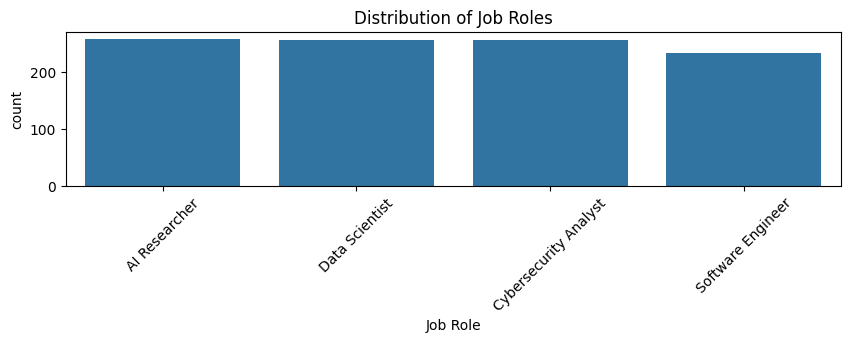

C:\Users\UseR\AppData\Local\Temp\ipykernel_9916\2992935345.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recruiter Decision', data=subset, order=subset["Recruiter Decision"], palette='pastel')
C:\Users\UseR\AppData\Local\Temp\ipykernel_9916\2992935345.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recruiter Decision', data=subset, order=subset["Recruiter Decision"], palette='pastel')
C:\Users\UseR\AppData\Local\Temp\ipykernel_9916\2992935345.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recruiter Decision',

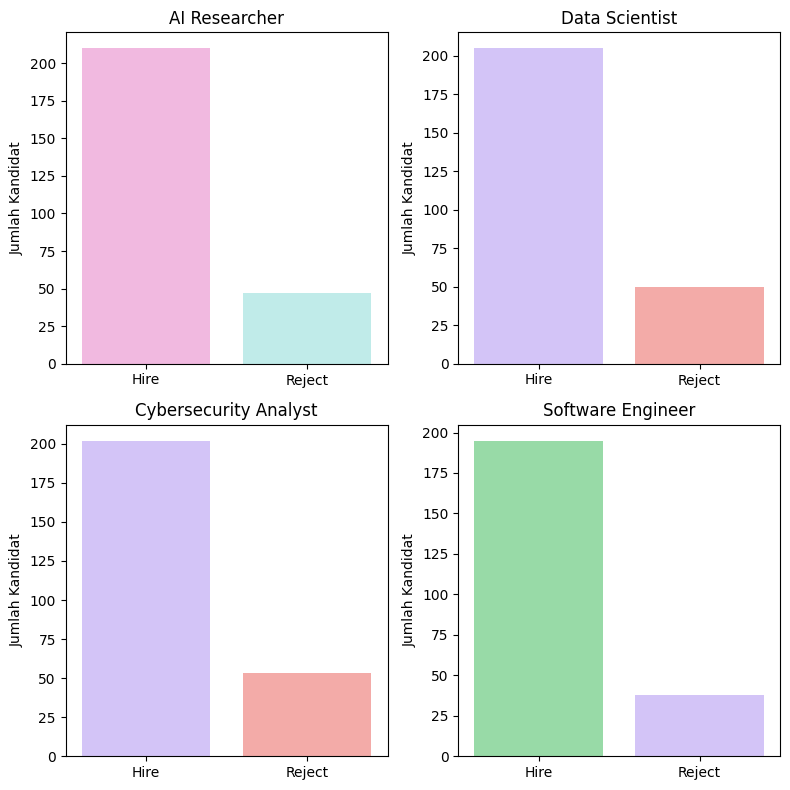

In [120]:
#Visualize data distribution
plt.figure(figsize=(10, 2))
sns.countplot(data=resume_df, x='Job Role', order=resume_df['Job Role'].value_counts().index)
plt.title('Distribution of Job Roles')
plt.xticks(rotation=45)
plt.show()

#Visualize each job role hiring
job_roles = resume_df['Job Role'].unique()

#Setup figure grid
plt.figure(figsize=(8, 8))

for index, role in enumerate(job_roles):
    plt.subplot(2, 2, index + 1)  # Grid 4x4 untuk max 16 job role
    
    # Filter data untuk job role tertentu
    subset = resume_df[resume_df['Job Role'] == role]
    
    # Plot countplot untuk Granite Decision (Hire vs Reject)
    sns.countplot(x='Recruiter Decision', data=subset, order=subset["Recruiter Decision"], palette='pastel')
    
    plt.title(f"{role}")
    plt.xlabel('')
    plt.ylabel('Jumlah Kandidat')

# Rapikan layout agar tidak saling tumpuk
plt.tight_layout()
plt.show()

## Preprocessing

Clean data and format candidate profiles for LLM input.

In [153]:
# Drop irrelevant columns for analysis
cleaned_df = resume_df.drop(['Resume_ID', 'Salary Expectation ($)'], axis=1)


# Sample 5 candidates for demo
sample_df = cleaned_df.sample(6)

def format_profile(row):
    return f"""
Entry: {row.name}
Name: {row['Name']}
Job Role: {row['Job Role']}
Skills: {row['Skills']}
Experience: {row['Experience (Years)']} years
Certifications: {row['Certifications']}
Education: {row['Education']}
Projects: {row['Projects Count']}
    """

candidate_profiles = "".join(sample_df.apply(format_profile, axis=1))

sample_df

,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Projects Count,AI Score (0-100)
37,Jason Flores,"C++, SQL, Java",5,B.Tech,Google ML,Software Engineer,Hire,7,100
746,Susan Andrews,"NLP, TensorFlow",6,B.Tech,Google ML,AI Researcher,Hire,10,100
184,Justin Myers Jr.,"React, Java, C++, SQL",7,M.Tech,Deep Learning Specialization,Software Engineer,Hire,3,100
198,Zachary Harris,"Ethical Hacking, Cybersecurity, Linux",3,M.Tech,Deep Learning Specialization,Cybersecurity Analyst,Reject,0,55
409,Raymond Perez,"Python, SQL",0,PhD,Deep Learning Specialization,Data Scientist,Hire,9,65
654,Steven Haney,"Ethical Hacking, Networking",9,B.Sc,Google ML,Cybersecurity Analyst,Hire,1,100


## Prompt Engineering

Define prompt for summarization and classification.

In [155]:
#Prompting and fine tune with parameter

template = """
You are an AI assistant that evaluates resumes for a given job role.  
Scoring is based on 5 criteria, with higher weight for the first 3 (most important).  

Scoring Rules:  
1. Skills (highest weight): 
   - >3 relevant skills → 4 points  
   - 2–3 skills → 2 points  
   - ≤1 skill → 0 points  

2. Experience: 
   - >5 years → 3 points  
   - 1–5 years → 2 points  
   - <1 year or none → 0 points  

3. Certifications:  
   - At least 1 relevant certification → 2 points  
   - None → 0 points  

4. Education: 
   - Ph.D. → 2 points  
   - Master’s → 1 point  
   - Bachelor’s or lower → 0 points  

5. Projects (lowest weight):
   - >3 projects → 2 points  
   - 1–3 projects → 1 point  
   - None → 0 points  

Decision Rule:  
- Hire if:  
  - Skills ≥ 3 points AND Experience ≥ 2 points  
  - AND (Certification ≥ 1 OR Education ≥ 1)  
- Otherwise: Reject  

Candidate resumes:
{candidate_profiles}
Output Format (JSON only, no text outside JSON):    
{
  "candidate": [
    {
      "entry": 101,
      "name": "Alice",
      "decision": "Hire",
      "summary": {
        "skill": 4,
        "experience": 3,
        "certification": 2,
        "education": 1,
        "project": 2
      },
      {
      "entry": 102,
      "name": "Bob",
      "decision": "Reject",
      "summary": {
        "skill": 0,
        "experience": 2,
        "certification": 0,
        "education": 1,
        "project": 0
      }
    }
  ]
}
"""

prompt3 = template.replace("{candidate_profiles}", candidate_profiles)

parameters = {
    "top_k": 0,
    "top_p": 1.0,
    "max_tokens": 2048,
    "min_tokens": 0,
    "random_seed": None,
    "repetition_penalty": 1.0,
    #"stopping_criteria": "length (768 tokens)",
    "stopping_sequence": None
}

response = llm.invoke(
    prompt3,
    parameters=parameters
)

print(response)

```json
{
  "candidate": [
    {
      "entry": 37,
      "name": "Jason Flores",
      "decision": "Hire",
      "summary": {
        "skill": 4,
        "experience": 2,
        "certification": 2,
        "education": 0,
        "project": 2
      }
    },
    {
      "entry": 746,
      "name": "Susan Andrews",
      "decision": "Hire",
      "summary": {
        "skill": 4,
        "experience": 3,
        "certification": 2,
        "education": 0,
        "project": 2
      }
    },
    {
      "entry": 184,
      "name": "Justin Myers Jr.",
      "decision": "Hire",
      "summary": {
        "skill": 4,
        "experience": 3,
        "certification": 2,
        "education": 1,
        "project": 1
      }
    },
    {
      "entry": 198,
      "name": "Zachary Harris",
      "decision": "Reject",
      "summary": {
        "skill": 3,
        "experience": 2,
        "certification": 2,
        "education": 1,
        "project": 0
      }
    },
    {
      "entry": 409,
   

In [156]:
import json
try:
    # Remove markdown code block formatting if present
    json_str = response.replace('```json', '').replace('```', '').strip()
    json_out = json.loads(json_str)
except json.JSONDecodeError as e:
    print(f"Failed to parse JSON: {str(e)}")
except Exception as e:
    print(f"Unexpected error: {str(e)}")

granite_decison = pd.json_normalize(json_out["candidate"])

granite_decison

,entry,name,decision,summary.skill,summary.experience,summary.certification,summary.education,summary.project
0,37,Jason Flores,Hire,4,2,2,0,2
1,746,Susan Andrews,Hire,4,3,2,0,2
2,184,Justin Myers Jr.,Hire,4,3,2,1,1
3,198,Zachary Harris,Reject,3,2,2,1,0
4,409,Raymond Perez,Hire,2,0,2,2,2
5,654,Steven Haney,Hire,3,3,2,0,1


## Evaluation and Conclusion

Summarize results and discuss implications for HR screening.

In [157]:
#Evaluation wirh 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Parsing output of decision
y_true = sample_df["Recruiter Decision"].map({'Hire': 1, 'Reject': 0})
y_pred = granite_decison["decision"].map({'Hire': 1, 'Reject': 0})

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:\n", cm)


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
 [[1 0]
 [0 5]]
